## ETL for Text Data
***
* The course description and the instructor introduction are the text data we collect for each courses. 
* This notebook aims to transfer the text data into numerical data so that I can perform regression analysis. 
* Latent Dirichlet Allocation (LDA) is a topic model and is used to classify text in a document to a particular topic.
* With LDA, we can find the topic distribution, which is a numerical data. 
***

In [1]:
import pandas as pd
from text_mining import preprocess_sent, preprocess_word, lda_topic_model, word_cloud, dominant_topic, show_topic
%matplotlib inline


In [2]:
data = pd.read_pickle("data.pkl")
data.head()
data.columns

Index(['id', 'name', 'seller', 'price', 'original_price', 'lectures', 'hours',
       'level', 'enrollment', 'rating', 'num_ratings', 'five_stars',
       'four_stars', 'three_stars', 'two_stars', 'description',
       'downloadable_resources', 'instructor_info', 'instructor_no_courses'],
      dtype='object')

## 1. LDA for course description

### Create the LDA model

In [3]:
pd_docs = data[["id","description"]].copy()
pd_docs["description"].fillna(" ", inplace=True)
text_lists = [preprocess_sent(text) for text in pd_docs["description"].to_list()]
token_lists = [preprocess_word(text) for text in text_lists]
LDA_model, corpus, dictionary = lda_topic_model(token_lists, 10,"LDA_model.gensim")

(0, '0.021*"custom" + 0.008*"inform" + 0.008*"descript" + 0.007*"interview" + 0.007*"market" + 0.007*"requir" + 0.006*"analyt" + 0.006*"show" + 0.006*"chain" + 0.006*"insur"')
(1, '0.026*"curso" + 0.024*"power" + 0.022*"bi" + 0.011*"descript" + 0.011*"requir" + 0.011*"show" + 0.010*"dato" + 0.008*"aprend" + 0.008*"b" + 0.008*"sico"')
(2, '0.017*"report" + 0.012*"sql" + 0.010*"pentaho" + 0.010*"power" + 0.008*"json" + 0.008*"bi" + 0.008*"postgr" + 0.007*"use" + 0.007*"server" + 0.007*"gi"')
(3, '0.023*"googl" + 0.014*"requir" + 0.013*"studio" + 0.013*"descript" + 0.013*"analyt" + 0.011*"queri" + 0.010*"databas" + 0.009*"knowledg" + 0.009*"show" + 0.007*"sql"')
(4, '0.022*"blockchain" + 0.014*"sa" + 0.012*"pivot" + 0.012*"technolog" + 0.011*"requir" + 0.011*"tabl" + 0.010*"descript" + 0.009*"analyt" + 0.008*"excel" + 0.008*"show"')
(5, '0.044*"busi" + 0.026*"analysi" + 0.022*"requir" + 0.016*"python" + 0.016*"learn" + 0.014*"r" + 0.014*"descript" + 0.013*"process" + 0.011*"problem" + 0.0

### Plot word cloud of all texts

Plot word cloud of all texts


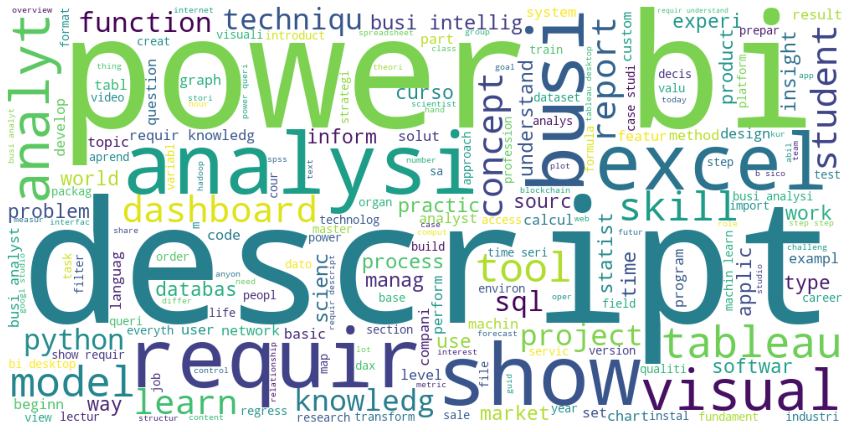

In [4]:
print("Plot word cloud of all texts")
word_cloud(token_lists)


### Find Dominant Topic for Each Course Description

In [5]:
text_topic_df = dominant_topic(LDA_model, corpus, pd_docs["description"],"description_text_topics.csv")
text_topic_df.head(3)

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Abstract
0,7.0,0.9506,"sql, excel, databas, function, analysi, requir...",Use SQL to query a database Use SQL to perform...
1,9.0,0.9076,"tableau, power, visual, bi, dashboard, chart, ...",Install Tableau Desktop 2020 Connect Tableau t...
2,9.0,0.9864,"tableau, power, visual, bi, dashboard, chart, ...",At the end of this course students will be abl...


### Visualize LDA Topics

Show topic, No.  0
Keywords custom, inform, descript, interview, market, requir, analyt, show, chain, insur
Cette formation couvre les principaux sujets les concepts de base associ s au RGPD GDPR  Les six principes de la protection des donn es Les cat gories particuli res de donn es personnelles Les droits des personnes concern es  y compris les demandes d acc s aux donn es Contr leurs et processeurs Protection des donn es par conception  Privacy by Design  Protection des donn es personnelles Signalement des violations de donn es   caract re personnelle Comment r aliser une  tude d impact sur la protection des donn es  DPIA  Le r le du d l gu    la protection des donn es  DPD  Le transfert de donn es   caract re personnel en dehors de l UE Les pouvoirs des autorit s de surveillance Requirements Il n y a pas de conditions d entr e formelles  Description D’une portée et d’une application plus étendues que l’actuelle loi sur la protection des données, le GDPR de l’UE étend les droits des 

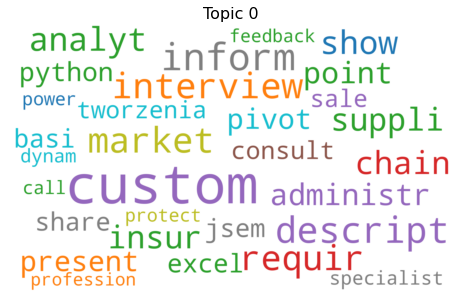

In [6]:
show_topic(text_topic_df,LDA_model, 0,3)

Show topic, No.  1
Keywords curso, power, bi, descript, requir, show, dato, aprend, b, sico
Qu  es una tabla din mica y la raz n m s importante para usarlas en cada una de tus tareas  Entendiendo esta parte te ahorrar s grandes problemas a futuro  Qu  condiciones deben cumplir los datos con los que trabajar s  Entender este paso  ya te permite superar al resto que solo buscan terminar la tarea  pero cuando las cosas salen mal  no saben explicar qu  fall   C mo extraer y trabajar con los datos desde otras tecnolog as y que ni te imaginabas que pod as hacer  y por qu  todos se limitan simplemente a recibir los datos de una simple hoja de Excel c mo se los entreguen o usar los que ya tienen  Conocer esta simple pero poderosa t cnica te convertir  en un verdadero gur  tecnol gico a los ojos de los dem s y te aseguro que ser s admirado por tu entorno solo por el hecho de saber hacerlo   Explicado en el m dulo 2  lecci n 6  7  8 y 9  C mo trabajar con datos de otras tablas y porqu  esto te b

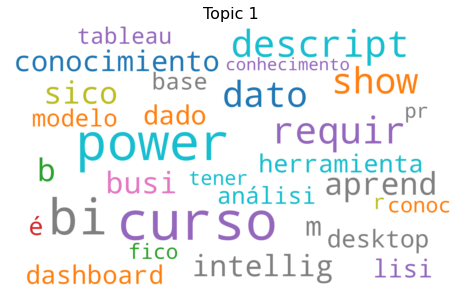

In [7]:
show_topic(text_topic_df,LDA_model, 1,3)

Show topic, No.  2
Keywords report, sql, pentaho, power, json, bi, postgr, use, server, gi
Podstawowych metod pozyskiwania  przechowywania i przetwarzania danych  Wydobywania wiedzy ze struktur danych i r  nych system w informatycznych  Konstrukcji zapyta  SQL do relacyjnych baz danych  Wybranych metod informatycznych  graficznych  statystycznych i matematycznych zwi zanych z analiz  danych  Wykorzystania podej cia ilo ciowego do opisu i analizy otaczaj cej rzeczywisto ci w aspektach biznesowych i ekonomicznych  Wyboru narz dzi i oprogramowania wspomagaj cego analiz  danych  Requirements Nie ma  adnych minimalnych wymaga  do wzi cia udzia u w tym szkoleniu  Podstawy u ytkowania Excela mog  u atwi  udzia  w szkoleniu  ale nie s  konieczne  Description W dzisiejszych czasach różne systemy informatyczne gromadzą i przetwarzają ogromne ilości danych. Umiejętność ich wykorzystania jest koniecznością dla wielu organizacji nie tylko żeby utrzymać przewagę na rynku, ale żeby być w stanie zaspo

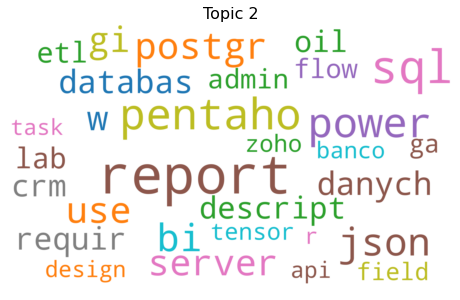

In [8]:
show_topic(text_topic_df,LDA_model, 2,3)

Show topic, No.  3
Keywords googl, requir, studio, descript, analyt, queri, databas, knowledg, show, sql
Design distributed systems that manage  big data  using Hadoop and related technologies  Use HDFS and MapReduce for storing and analyzing data at scale  Use Pig and Spark to create scripts to process data on a Hadoop cluster in more complex ways  Analyze relational data using Hive and MySQL Analyze non relational data using HBase  Cassandra  and MongoDB Query data interactively with Drill  Phoenix  and Presto Choose an appropriate data storage technology for your application Understand how Hadoop clusters are managed by YARN  Tez  Mesos  Zookeeper  Zeppelin  Hue  and Oozie  Publish data to your Hadoop cluster using Kafka  Sqoop  and Flume Consume streaming data using Spark Streaming  Flink  and Storm Requirements You will need access to a PC running 64 bit Windows  MacOS  or Linux with an Internet connection and at least 8GB of  free   not total  RAM  if you want to participate in t

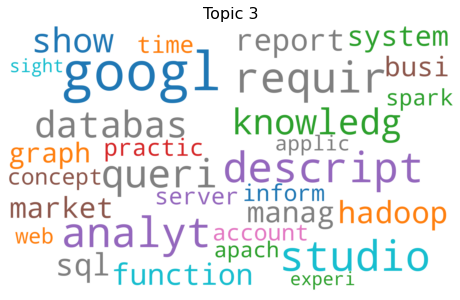

In [9]:
show_topic(text_topic_df,LDA_model, 3,3)

Show topic, No.  4
Keywords blockchain, sa, pivot, technolog, requir, tabl, descript, analyt, excel, show
Gro e Datenmengen schnell und einfach in eine  bersichtliche Struktur bringen Produktportfolio analysieren  bewerten und Handlungsma nahmen ableiten Schnelle und einfache Methode zur Klassifizierung gro er Artikelvielzahl Eigenschaften  Funktion und Vorgehensweise bei der ABC   XYZ  und ABC XYZ Analyse Erstellung einer dynamischen ABC Analyse mit Pivot in Excel und Visualisierung der Ergebnisse Erstellung einer XYZ Analyse mit Pivot in Excel und Visualisierung der Ergebnisse Erstellung einer ABC XYZ Matrix mit Pivot in Excel und Visualisierung der Ergebnisse Requirements Excel Grundkenntnisse sowie eine aktuelle Excel Version sollten vorhanden sein  Description Was können Sie tun, um hohe Lagerbestände und Lieferbereitschaftsprobleme zu vermeiden? Häufig beklagen Unternehmen verlorene Umsätze aufgrund schlechter Lieferfähigkeit. Dabei steht das Lager randvoll mit Rohmaterial, Halb-

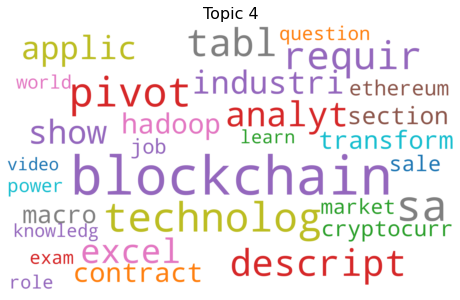

In [10]:
show_topic(text_topic_df,LDA_model, 4,3)

Show topic, No.  5
Keywords busi, analysi, requir, python, learn, r, descript, process, problem, show
Get hands on and understand Neural Networks with TensorFlow and PyTorch Understand how and when to apply autoencoders Develop an autonomous agent in an Atari environment with OpenAI Gym Apply NLP and sentiment analysis to your data Develop a multilayer perceptron neural network to predict fraud and hospital patient readmission Build convolutional neural network classifier to automatically identify a photograph Learn how to build a recurrent neural network to forecast time series and stock market data Know how to build Long Short Term Memory Model  LSTM  model to classify movie reviews as positive or negative using Natural Language Processing  NLP  Get familiar with PyTorch fundamentals and code a deep neural network Perform image captioning and grammar parsing using Natural Language Processing Requirements Basic knowledge of Python is required  Familiarity with TensorFlow and PyTorch w

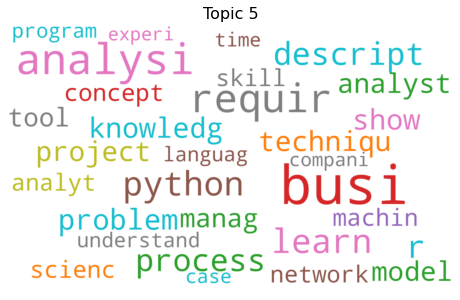

In [11]:
show_topic(text_topic_df,LDA_model, 5,3)

Show topic, No.  6
Keywords model, analysi, regress, statist, analyt, descript, requir, test, techniqu, knowledg
This course aims to provide econometrics quantitative predictive modelling skills This course aims to provide basic to intermediate skills on implementing Econometrics Predictive modelling concepts using Eviews software  Whilst its important to develop understanding of econometrics quantitative modelling concepts  its equally important to be able to implement it using suitable software packages  This course fills the gap between understanding the concepts and implementing them practically Descriptive Statistics  Means  Standard Deviation and T test   This course explains descriptive statistics concepts which will act as building blocks to subsequent courses Correlation Techniques   Correlation techniques explain relationships across variables and are important in explain the model fitment in regression courses Regression modelling   Regression modelling forms the core of Pre

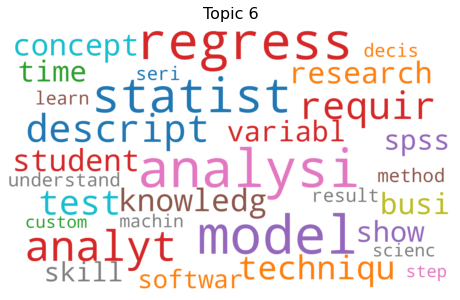

In [12]:
show_topic(text_topic_df,LDA_model, 6,3)

Show topic, No.  7
Keywords sql, excel, databas, function, analysi, requir, descript, queri, show, formula
Apr s cette formation  vous serez   mesure d impl menter des jobs sous Talend  de r aliser des mappings avec les flux de donn es  de vous connectez   une base de donn es postgreSql et oracle  alimentez les donn es en base sous les diff rentes formes de fichiers CSV TXT XML XLS      Vous serez  galement   mesure d orchestrer plusieurs jobs  de construire des jobs et de les ex cuter sur n importe quel syst me d exploitation  Vous serez capable de mettre en place un Business model  Vous serez autonome dans la cr ation des routines pour une transformation de donn es Plus de besoin de payer une  norme somme d argent pour se former en Talend car je mets mon exp rience de formation   votre disposition avec plus d explications et d tails   et mieux encore les services Web REST et SOAP    Requirements Talend Open Studio  TOS  est un ETL tr s puissant avec 900 composants et des connecteurs 

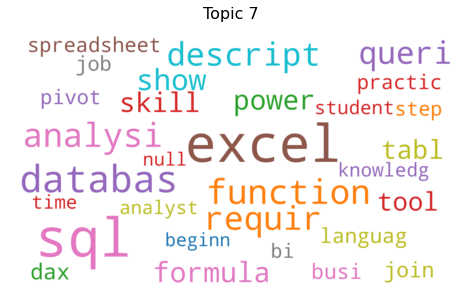

In [13]:
show_topic(text_topic_df,LDA_model, 7,3)

Show topic, No.  8
Keywords ve, veri, visualis, xgboost, show, descript, requir, bu, r, jupyt
Excel  csv  text  pdf ve mekansal dosya t rlerinde farkl  veri setlerine ba lanma Veri haz rlama  data preparation  data cleaning  Farkl  veri setleri veya tablolar aras nda join  birle tirme  ve blending  harmanlama  yapma Mavi  blue  ve ye il  green  haplar  pills  aras ndaki fark  anlama Grup ve k me  zelli ini kullanarak verinizi d zenleme Lokal  global ve veri kayna  nda filtreleme yapma Alanlar  zerinde hesaplamalar yapma  calculations  Yeni alanlar olu turma  calculated fields  Parametre olu turma Grafikleri bi imlendirme Show more Requirements Dikkat  ekici grafikler ve g rseller haz rlamak istemek Veriyi g rselle tirmek ve anlamak istemek Kursta Tableau Desktop 10 kullan lacakt r  Program n 14 g nl k deneme s resi vard r  Deneme s resi sona erenler s n rs z kullan m  olan Tableau Public versiyonunu indirebilir  Kurs i inde bu programlar n nas l kurulaca   anlat lacakt r  Not  Program 

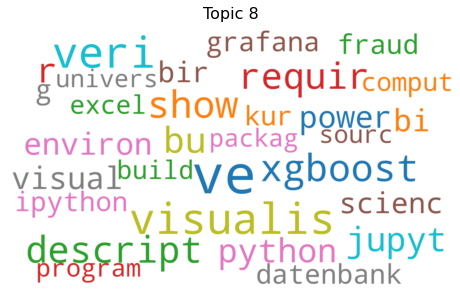

In [14]:
show_topic(text_topic_df,LDA_model, 8,3)

Show topic, No.  9
Keywords tableau, power, visual, bi, dashboard, chart, busi, analyt, report, requir
Understand the importance of Data Modeling for optimization and performance  Create powerful calculations and analytics with DAX  Create dashboards and real time reports to share with business users on the web and on mobile  Integrate Power BI with other tools  including Microsoft Excel to connect your Excel workbooks  Load  process  and clean data to make an engaging data analysis  Work with Power Query  DAX  and standard Power BI visualizations to create insightful and actionable reports in Power BI  Publish your dashboard to the web to have powerful  tile based  data fusion  and tailor made data for the effective executive Get introduced to a narrative oriented custom visual  Power BI s navigation capabilities  and a powerful storytelling feature Requirements Taking up this Course doesn t need you to be an expert with Microsoft Power BI  A Data Analyst  Business Analyst or a Digita

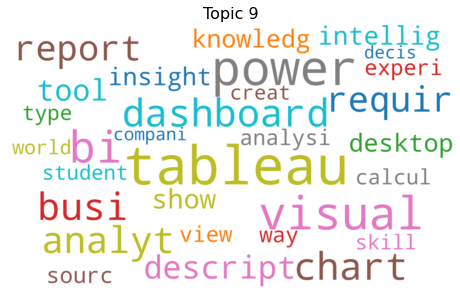

In [15]:
show_topic(text_topic_df,LDA_model, 9,3)

### Document counts in each topic

In [16]:
print("Document counts in each topic")
print(text_topic_df['Dominant_Topic'].value_counts().sort_index())

Document counts in each topic
0.0     15
1.0    121
2.0     10
3.0     76
4.0     29
5.0    230
6.0    127
7.0    131
8.0     14
9.0    252
Name: Dominant_Topic, dtype: int64


### Add the Topic Distribution Matrix into the Dataset

In [17]:
corpus_lda = LDA_model[corpus]
description_LDA = pd.DataFrame([[topic[1] for topic in doc]
                                        if doc != [] else [0,0]
                                        for doc in corpus_lda])
description_LDA.columns = ["descr_LDA_"+str(i) for i in range(10)]
description_LDA.fillna(0,inplace=True)
description_LDA.index = data.index

## 2. LDA for Instructor Information
### Create the LDA model

In [18]:
pd_docs = data[["id","instructor_info"]].copy()
pd_docs["instructor_info"].fillna(" ", inplace=True)
text_lists = [preprocess_sent(text) for text in pd_docs["instructor_info"].to_list()]
token_lists = [preprocess_word(text) for text in text_lists]
LDA_model, corpus, dictionary = lda_topic_model(token_lists, 10,"LDA_model.gensim")

(0, '0.030*"scienc" + 0.029*"cours" + 0.020*"univers" + 0.016*"show" + 0.015*"market" + 0.015*"technolog" + 0.014*"analyt" + 0.013*"experi" + 0.012*"team" + 0.011*"year"')
(1, '0.039*"financ" + 0.026*"analyt" + 0.020*"cours" + 0.020*"career" + 0.017*"firm" + 0.016*"analysi" + 0.015*"student" + 0.014*"countri" + 0.013*"show" + 0.013*"account"')
(2, '0.023*"cours" + 0.020*"analyt" + 0.019*"year" + 0.019*"show" + 0.016*"busi" + 0.015*"compani" + 0.015*"experi" + 0.015*"consult" + 0.014*"scientist" + 0.012*"bi"')
(3, '0.060*"busi" + 0.032*"analyt" + 0.027*"manag" + 0.025*"experi" + 0.024*"year" + 0.021*"show" + 0.018*"project" + 0.014*"compani" + 0.013*"consult" + 0.013*"scienc"')
(4, '0.013*"research" + 0.012*"ph" + 0.012*"univers" + 0.011*"scienc" + 0.009*"engin" + 0.009*"show" + 0.008*"year" + 0.008*"econom" + 0.008*"professor" + 0.008*"rené"')
(5, '0.018*"account" + 0.015*"área" + 0.014*"show" + 0.013*"busi" + 0.013*"year" + 0.012*"manag" + 0.011*"excel" + 0.010*"paula" + 0.009*"field"

### Plot Wordcloud of the Instructor Introduction

Plot word cloud of all texts


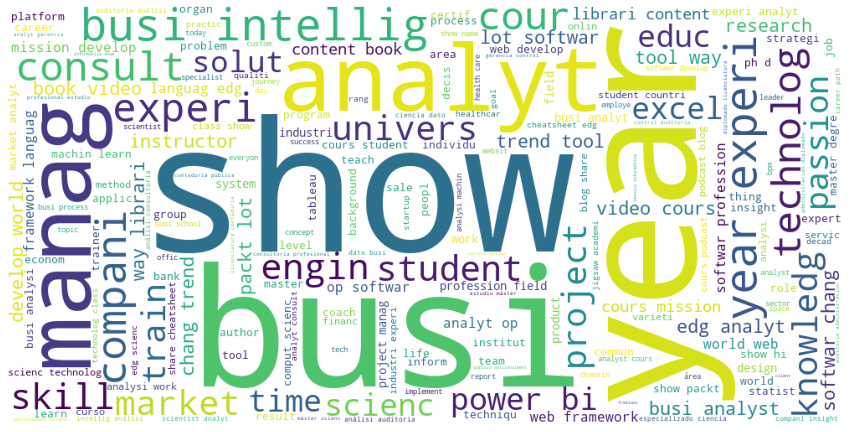

In [19]:
print("Plot word cloud of all texts")
word_cloud(token_lists)

### Find Topic Distribution of Instructor Introduction

In [20]:
text_topic_df = dominant_topic(LDA_model, corpus, pd_docs["instructor_info"],"instructor_text_topics.csv")
text_topic_df.head(3)

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Abstract
0,3.0,0.7030,"busi, analyt, manag, experi, year, show, proje...",Jose Marcial Portilla has a BS and MS in Mec...
1,0.0,0.9437,"scienc, cours, univers, show, market, technolo...","Hi there, We are the Ligency PR and Marketing ..."
2,9.0,0.8348,"softwar, develop, cours, analysi, tool, web, w...",Experience as (Web) Developer Starting out at ...


### Visualize LDA Topics

Show topic, No.  0
Keywords scienc, cours, univers, show, market, technolog, analyt, experi, team, year
I am Ash Narayan Sah working as assistant professor in the area of Economics and Econometrics in Thapar University, Patiala. I am a doctorate in Economics. I started doing my specilization in the economics area after my 12th. I completed my graduation in economics with honours from Utkal University in 1997. I did my master in economics from Hyderabad Central University, Andhra Pradesh in 2000. I also did my M.Phil in Economics and after M.Phil, I enrolled for my PhD in Financial Economics in Hyderabad Central University. After completion of my PhD, I joined as an assistant professor in University of Petroleum and Energy Studies, Dehradun in January 2007. I worked for 5 years in University of Petroleum and Energy Studies and taught basic econometrics course and mangerial economics to MBA students. During my stay at University of petroleum and Energy Studies, I realized the need of dat

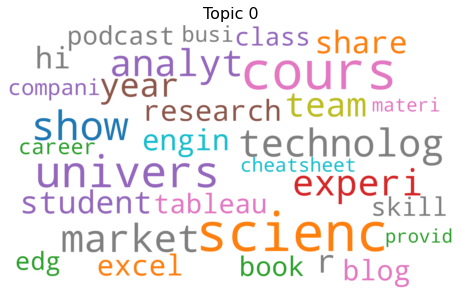

In [21]:
show_topic(text_topic_df,LDA_model, 0,3)

Show topic, No.  1
Keywords financ, analyt, cours, career, firm, analysi, student, countri, show, account
We are an Analytics firm committed to developing intellectual property that will help individuals and their organisation take smarter decisions every day. ATI, the education arm of Redwood Associates has helped 200 companies and over 15000 individuals speak the language of DATA The founder Gautam Munshi has nearly two decades of high performance analytics experience. His strong belief that anyone can become an analyst has led him to build a team of 12 - a group of math geeks, techies, musicians, comedians, beer enthusiasts, agriculturists, geneticists, teachers and bankers,who have the gumption that they can make a difference and truly believe that analytics can influence and make a huge impact on a day-day basis. It is this diverse lot that brings Analytics to the mind space of every individual. You can view their moments in the lime light here and follow them on Facebook Show mor

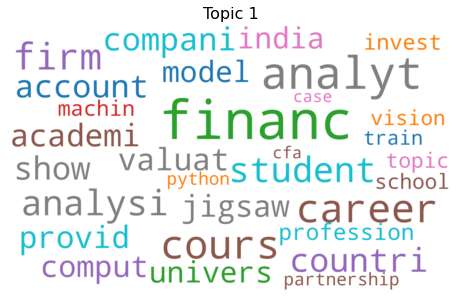

In [22]:
show_topic(text_topic_df,LDA_model, 1,3)

Show topic, No.  2
Keywords cours, analyt, year, show, busi, compani, experi, consult, scientist, bi
Dott.ssa Turri Michela laureata a pieni voti presso la Facoltà di Economia dell’Università degli Studi di Pisa, ha successivamente arricchito il proprio Curriculum Vitae sia grazie ad un master tributario che un master in finanza aziendale presso l'università Bocconi di Milano sia grazie alle numerose esperienze formativo/professionali presso importanti Società multinazionali di Consulenza e di Revisione, come la Deloitte & Touch e la Ernst & Young International. Ha conseguito l’abilitazione alla Professione di Dottore Commercialista ed è iscritta all’albo dei dottori Commercialisti ed esperti contabili della Provincia di Lucca al n° 569 ed al registro dei Revisori Contabili al n° 125713. Svolge incarichi come C.T.U. e come curatore fallimentare. Oltre all’ambito Contabile-Amministrativo, Consulenza del Lavoro e la specializzazione ha riguardato in seguito anche ambiti sempre più al cen

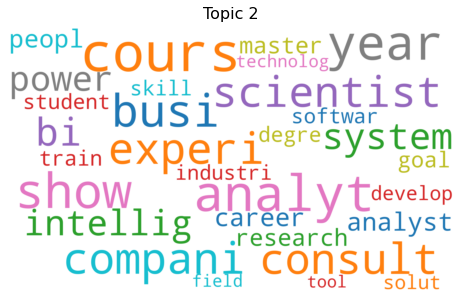

In [23]:
show_topic(text_topic_df,LDA_model, 2,3)

Show topic, No.  3
Keywords busi, analyt, manag, experi, year, show, project, compani, consult, scienc
Barbara Berry, MA, MS, APRN, has over a decade of management experience in the public health sector. She has an MA in Experimental Psychology from Northeastern University, an MS in Applied Statistics from the University of Northern Colorado, and an MS in Nursing from the University of Cincinnati. An enjoyable experience was her 7 years of teaching undergraduate applied statistics at Kansas State University. As an Adjunct Instructor, she had a reputation among students for making statistics relevant and important in their lives.  She wrote many federal grants as a Public Health Manager, to include a rural health network development grant to improve medical and public health care delivery. Public health management required developing partnerships and interfacing with various organizations to achieve strategic goals and objectives. As Public Health Project Manager, she supervised communi

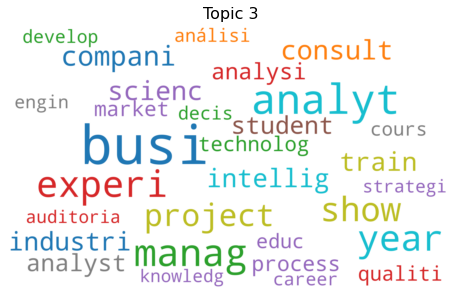

In [24]:
show_topic(text_topic_df,LDA_model, 3,3)

Show topic, No.  4
Keywords research, ph, univers, scienc, engin, show, year, econom, professor, rené
Pekerjaan sehari-hari sebagai penilai aset di berbagai perusahaan konsultan, selalu membuatnya berhadapan dengan begitu banyak data yang harus di analisa, suatu hari menemukan software Microsoft Power BI sebagai tools yang sangat berguna untuk mengatasi masalahnya. Deddy memiliki pengalaman lebih dari 10 tahun di perusahaan Konsultan Penilai aset, akan dengan senang hati memberikan pengetahuan Power BI yang dimilikinya ke dalam Pelatihan yang diadakan oleh Udemy ini Tidak dibutuhkan keahlian pemrograman yang kompleks dalam mempelajari Power BI ini, semua khalangan bisa menerapkannya, Show more
0.9839000105857849
En ALTHUM Consultores acompañamos a empresas y personas de toda latinoamérica a mejorar sus resultados, a alcanzar sus objetivos y visión, a potenciar sus habilidades y a crecer de forma integral.  LEONARDO NAVARRO BUSTAMANTE. Es Ingeniero Industrial con Posgrados en Ingeniería

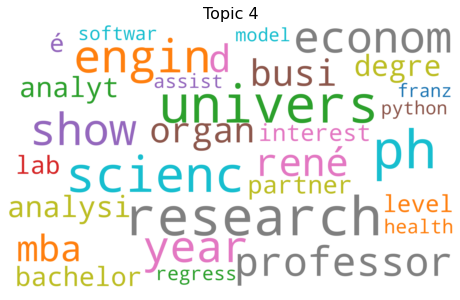

In [25]:
show_topic(text_topic_df,LDA_model, 4,3)

Show topic, No.  5
Keywords account, área, show, busi, year, manag, excel, paula, field, cours
Por que estudar na área de dados comigo? Sou profissional da área com diversos projetos desenvolvidos, tanto na área privada como na área pública, tenho um skill muito forte em atender meus alunos com alguma dúvida no máximo em 24 horas. Procuro alinhar conhecimento teórico e prático. O que trago em meus cursos? Acho que a área de dados é bem rica e vasta, mas ter um direcionamento do que deve ser estudado com cursos passo a passo é o que busco nas minhas aulas, fiz um mestrado na área de educação para criar aulas sob medida aos meus alunos. Estou diariamente aprimorando e trazendo novidades na área, afinal criar + de 100 cursos envolve dedicação e foco.  Show more
0.9790999889373779
Por que estudar na área de dados comigo? Sou profissional da área com diversos projetos desenvolvidos, tanto na área privada como na área pública, tenho um skill muito forte em atender meus alunos com alguma dúvi

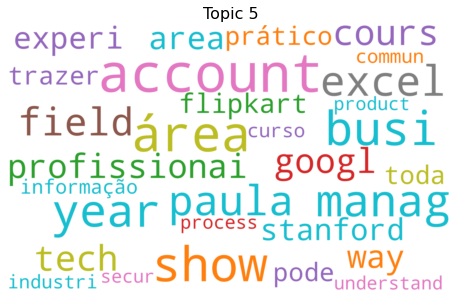

In [26]:
show_topic(text_topic_df,LDA_model, 5,3)

Show topic, No.  6
Keywords busi, analyt, tableau, intellig, power, year, manag, client, experi, show
Charles Rambo is a retired Lieutenant from the Fulton County Sheriff's Office with over three decades of demonstrated success in operations, administration, labor relations, investigations, and academy instruction. Charles is certified by the Georgia Peace Officers Standards and Training Council as a Senior Instructor, an intelligence analyst by the Department of Homeland Security and Classroom/Firearms Instructor by the Georgia Private Detective and Security Guard Agency. An author, speaker, panelist, and subject matter expert on criminal justice issues, his thought leadership has inspired hundreds of sworn and civilian staff to raise the bar on transparent and accountable performance.  Show more
0.9800000190734863
John Bura is has been a successful Udemy instructor since 2011. John Bura has been programming games since 1997 and teaching since 2002. John is the owner of the game devel

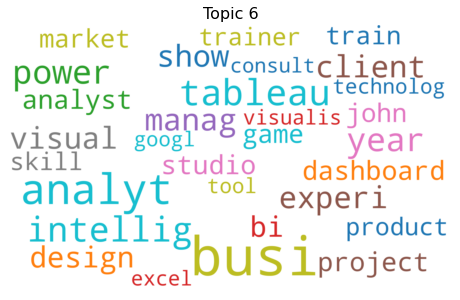

In [27]:
show_topic(text_topic_df,LDA_model, 6,3)

Show topic, No.  7
Keywords busi, manag, experi, director, show, year, master, qlik, view, market
I am currently working as a Qlik/BI Architect and managing a team of Developers. I am recognised as a Qlik Luminary for the year 2014 and 2017. Co-Founded Qlik Dev Group and author of QlikShare. Previous top 20 Global QlikView Community contributor. And I am certified, Scrum Master (PSM). Currently, pursuing masters in Data Science from the University of London.  I have been building Data platforms and BI applications since 2005. I had worked on many successful QlikView, QlikSense and SQL Server implementations, right from the inception through the implementation and deployment. My experience and skills range from application development and UI design to system administration. I can work autonomously and directly with business stakeholders at all levels to define requirements; then develop, document, test and deliver end to end projects within existing project management/delivery framework

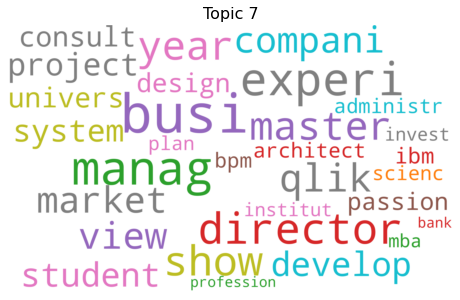

In [28]:
show_topic(text_topic_df,LDA_model, 7,3)

Show topic, No.  8
Keywords jeff, year, step, program, technolog, workforc, industri, null, analyt, time
Jeff Higgins is a global thought leader with 25 years combined workforce planning, analytics and finance experience supporting Fortune™ 500 companies. Jeff has helped organizations around the world quantify the ROI of workforce decisions and realize cost saving opportunities of up to $1.0 billion USD. Jeff is both a former senior HR executive and former CFO, and a regular speaker at HR events. Previously, Mr. Higgins worked in finance at Johnson & Johnson, Colgate Palmolive, Klune Industries and a senior HR leader at Countrywide Financial, IndyMac Bank, and Inform, a leading analytics software co. Jeff is on the SHRM Global Standards Committee on human capital, the Center for Talent Reporting board and founding member, PwC Saratoga Institute advisory council. Show more
0.982699990272522
Jeff Higgins is a global thought leader with 25 years combined workforce planning, analytics and 

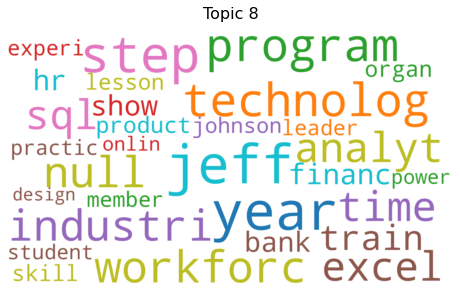

In [29]:
show_topic(text_topic_df,LDA_model, 8,3)

Show topic, No.  9
Keywords softwar, develop, cours, analysi, tool, web, way, analyt, lot, world
     Eğitmenimizin yazılıma olan merakı lise yıllarında başlamıştır. Yazılım ve teknolojiye olan ilgisi neticesinde ülkemizin güzide bir üniversitesinde Bilgisayar Mühendisliği bölümünü tercih etmiştir. Üniversite mezuniyeti sonrasında çeşitli kurumsal firmalarda Yazılım ve İş Zekası ile ilgili birçok proje içerisinde yer almıştır. Yine bu dönem içerisinde -kişisel bloğunda- Sql Server Veritabanı ile ilgili altmış'a yakın makale yazmıştır. Teknolojiye olan merakını, bitmek tükenmek bilmeyen öğrenme tutkusunu ayrıca geçmiş yıllarda edinmiş olduğu bilgi ve tecrübesini siz değerli yazılım tutkunları ile de paylaşmak için, Udemy platformu üzerinde eğitimler vermektedir. Ayrıca şuan özel bir firmada "Yazılım ve İş Zekası Uzmanı" pozisyonunda hayatını idâme ettirmektedir. Paylaşılan tüm dökümanların faydalı olması temennisi ile.. Show more
0.9890000224113464
     Eğitmenimizin yazılıma olan merak

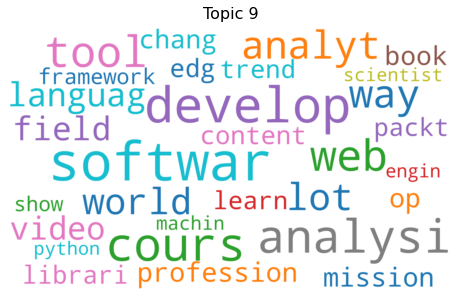

In [30]:
show_topic(text_topic_df,LDA_model, 9,3)

### Document counts in each topic

In [31]:
print("Document counts in each topic")
print(text_topic_df['Dominant_Topic'].value_counts().sort_index())

Document counts in each topic
0.0    143
1.0     50
2.0    126
3.0    222
4.0     40
5.0     38
6.0    116
7.0     67
8.0     38
9.0    165
Name: Dominant_Topic, dtype: int64


### Obtain Matrix of Topic Distribution

In [32]:
corpus_lda = LDA_model[corpus]
instructor_LDA = pd.DataFrame([[topic[1] for topic in doc]
                                        if doc != [] else [0,0]
                                        for doc in corpus_lda])
instructor_LDA.columns = ["instr_LDA_"+str(i) for i in range(10)]
instructor_LDA.fillna(0,inplace=True)
instructor_LDA.index = data.index

### Add Topic Distribution into Dataset

In [33]:
data = data.drop(["id","name","seller","description","instructor_info"], axis = 1)
data = pd.concat([data, description_LDA,instructor_LDA], axis=1)


## 3. Save the Dataset

In [34]:
print(data.shape)
data.head()


(1005, 34)


,price,original_price,lectures,hours,level,enrollment,rating,num_ratings,five_stars,four_stars,...,instr_LDA_0,instr_LDA_1,instr_LDA_2,instr_LDA_3,instr_LDA_4,instr_LDA_5,instr_LDA_6,instr_LDA_7,instr_LDA_8,instr_LDA_9
0,25.99,179.99,83,9.0,All Levels,342288.0,4.7,91772.0,0.60,0.33,...,0.140185,0.703021,0.073783,0.071684,0.0,0.0,0.0,0.0,0.0,0.0
1,16.99,124.99,82,9.0,All Levels,231631.0,4.6,61533.0,0.60,0.33,...,0.943746,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,12.99,94.99,275,23.5,Beginner,148077.0,4.6,43339.0,0.54,0.38,...,0.130506,0.834705,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,19.99,139.99,117,11.0,All Levels,109303.0,4.6,30899.0,0.61,0.33,...,0.233460,0.740728,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,12.99,94.99,413,20.5,All Levels,136869.0,4.5,28595.0,0.52,0.37,...,0.978047,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data.to_pickle("data_final.pkl")